# Notebook Setup

We'll install and import the needed libraries here.

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Dataset

According to the Kaggle Dataset Page:

> This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.
> 
> Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

In [87]:
df = pd.read_csv('/kaggle/input/ionosphere/ionosphere_data.csv')
df

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,...,column_z,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah,column_ai
0,True,False,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,True,False,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,True,False,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,True,False,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,True,False,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,True,False,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,True,False,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,True,False,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,True,False,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


# Preprocessing

## Class Distribution

The dataset has a class imbalance proble, but it's not that severe.

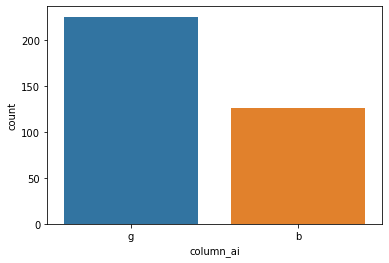

In [88]:
sns.countplot(x='column_ai', data=df)

## Removing the Useless Features

The second feature, `column_b`, has no variance and therefore isn't useful to the model.

In [89]:
df.drop(columns=['column_b'], inplace=True)

## Encoding the Output Classes

PyTorch takes in integer class indices in its loss functions.

In [90]:
df.rename(columns={'column_ai': 'label'}, inplace=True)
df['label'] = df.label.astype('category')
encoding = {'g': 1, 'b': 0}
df.label.replace(encoding, inplace=True)
df

,column_a,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k,...,column_z,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah,label
0,True,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,True,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,True,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,True,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,True,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,True,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,True,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,True,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,True,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


## Converting the Remaining Boolean Feature Into Numeric

In [91]:
df['column_a'] = df.column_a.astype('float64')

## Preparing the Dataset for Training and Validation

In [92]:
X = df.values[:, :-1]
y = df.values[:, -1]

In [93]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# The boolean feature does not need to be normalized.
x_train[:, 1:] = scaler.fit_transform(x_train[:, 1:])
x_test[:, 1:] = scaler.transform(x_test[:, 1:])

# Toying with the Dataset

Let's visualize the data and see if we can find anything interesting! We'll first use **t-SNE** to reduce the dimensions of the data while preserving the relative distance of the vectors.

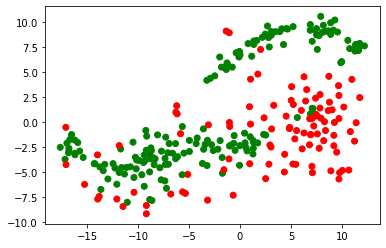

In [95]:
from sklearn.manifold import TSNE

x_embedded = TSNE(n_components=2).fit_transform(x_train)
plt.scatter(x_embedded[:, 0], x_embedded[:, 1], color=['green' if label else 'red' for label in y_train])
plt.show()

The dataset doesn't seem to be that complicated. Let's now see what it would look like when processed by the PCA algorithm:

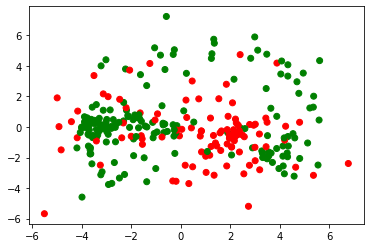

In [96]:
from sklearn.decomposition import PCA

x_embedded = PCA(n_components=2).fit_transform(x_train)
plt.scatter(x_embedded[:, 0], x_embedded[:, 1], color=['green' if label else 'red' for label in y_train])
plt.show()

With the right transformation, the dataset can even be linearly separated! We can expect a high accuracy of even a simple model.

# Modeling

We need to first define a few other modules before we can get to the network.

## Configurations

In [97]:
iterations = 100
batch_size = 32

## Data Pipeline

In [98]:
from torch.utils.data import Dataset


class TrainData(Dataset):
    
    def __init__(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
    
    def __getitem__(self, index):
        return self.x_train[index], self.y_train[index]
    
    def __len__ (self):
        return len(self.x_train)

    
class TestData(Dataset):
    
    def __init__(self, x_test):
        self.x_test = x_test
        
    def __getitem__(self, index):
        return self.x_test[index]
        
    def __len__ (self):
        return len(self.x_test)

In [99]:
train_data = TrainData(torch.from_numpy(x_train).to(torch.float32), torch.from_numpy(y_train).to(torch.float32))
test_data = TestData(torch.from_numpy(x_test).to(torch.float32))

In [100]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

## Model Definition

We'll be using a **DropOut** layer in the model to ensure that the network does not overfit on the training set.

In [101]:
class Network(nn.Module):
    
    def __init__(self):
        super().__init__()
        # Number of input features is 33.
        self.linear_1 = nn.Linear(33, 64)
        self.linear_2 = nn.Linear(64, 64)
        self.linear_3 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(p=0.1)
    
    def forward(self, inputs):
        out = self.linear_1(inputs)
        out = F.relu(out)
        out = self.linear_2(out)
        out = F.relu(out)
        out = self.dropout(out)
        out = self.linear_3(out)
        # Sigmoid activation is later applied by the loss function for numerical stability.
        return out

## Training

We'll use the **Area Under Curve** metric for evaluating the model during the training. Using the Accuracy metric is not a good idea, considering the label imbalance present in the dataset.

In [102]:
network = Network()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(network.parameters(), lr=1e-4)

In [103]:
from sklearn.metrics import roc_auc_score

n_batches = len(train_loader)

network.train()

loss_li = []
score_li = []

for it in range(iterations):
    it_loss = 0
    it_score = 0
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_real = y_batch.unsqueeze(1)
        y_pred = network(x_batch)
        loss = criterion(y_pred, y_real)
        y_pred = torch.sigmoid(y_pred.detach())
        score = roc_auc_score(y_real, y_pred)
        loss.backward()
        optimizer.step()
        it_loss += loss.item()
        it_score += score
    loss_li.append(it_loss / n_batches)
    score_li.append(it_score / n_batches)
    print('[Iteration {}] Loss: {:.4f}, Area-Under-Curve: {:.4f}'.format(it, it_loss / n_batches, it_score / n_batches))
        

[Iteration 0] Loss: 0.6813, Area-Under-Curve: 0.7147
[Iteration 1] Loss: 0.6785, Area-Under-Curve: 0.7186
[Iteration 2] Loss: 0.6722, Area-Under-Curve: 0.7591
[Iteration 3] Loss: 0.6652, Area-Under-Curve: 0.7910
[Iteration 4] Loss: 0.6621, Area-Under-Curve: 0.8066
[Iteration 5] Loss: 0.6551, Area-Under-Curve: 0.8380
[Iteration 6] Loss: 0.6499, Area-Under-Curve: 0.8479
[Iteration 7] Loss: 0.6425, Area-Under-Curve: 0.8399
[Iteration 8] Loss: 0.6368, Area-Under-Curve: 0.8601
[Iteration 9] Loss: 0.6302, Area-Under-Curve: 0.8726
[Iteration 10] Loss: 0.6277, Area-Under-Curve: 0.8538
[Iteration 11] Loss: 0.6184, Area-Under-Curve: 0.8673
[Iteration 12] Loss: 0.6104, Area-Under-Curve: 0.8774
[Iteration 13] Loss: 0.6022, Area-Under-Curve: 0.9037
[Iteration 14] Loss: 0.5979, Area-Under-Curve: 0.8831
[Iteration 15] Loss: 0.5894, Area-Under-Curve: 0.8834
[Iteration 16] Loss: 0.5820, Area-Under-Curve: 0.8852
[Iteration 17] Loss: 0.5760, Area-Under-Curve: 0.8734
[Iteration 18] Loss: 0.5675, Area-Unde

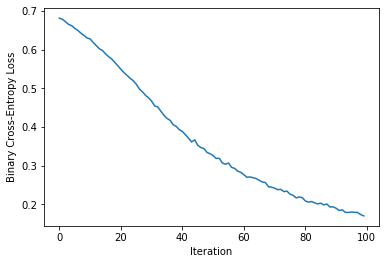

In [104]:
plt.plot(loss_li)
plt.xlabel('Iteration')
plt.ylabel('Binary Cross-Entropy Loss')
plt.show()

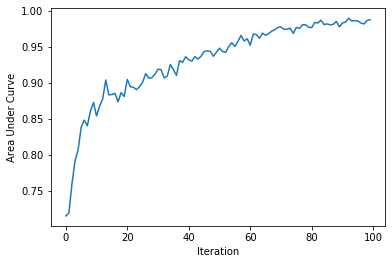

In [105]:
plt.plot(score_li)
plt.xlabel('Iteration')
plt.ylabel('Area Under Curve')
plt.show()

## Evaluation

We'll compute and analyze the **Confusion Matrix** of the model using `test_data`. Then, we'll compute the **Precision**, **Recall**, and **F1 Score** of each class.

In [106]:
network.eval()

predictions = []

with torch.no_grad():
    for x_batch in test_loader:
        y_pred = network(x_batch)
        y_pred = torch.sigmoid(y_pred)
        predictions.append(y_pred.squeeze().tolist())

y_pred = np.round(predictions)

In [107]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[21,  2],
       [ 2, 46]])

In [108]:
from sklearn.metrics import classification_report

classification_report(y_test, y_pred, output_dict=True)

{'0.0': {'precision': 0.9130434782608695,
  'recall': 0.9130434782608695,
  'f1-score': 0.9130434782608695,
  'support': 23},
 '1.0': {'precision': 0.9583333333333334,
  'recall': 0.9583333333333334,
  'f1-score': 0.9583333333333334,
  'support': 48},
 'accuracy': 0.9436619718309859,
 'macro avg': {'precision': 0.9356884057971014,
  'recall': 0.9356884057971014,
  'f1-score': 0.9356884057971014,
  'support': 71},
 'weighted avg': {'precision': 0.9436619718309859,
  'recall': 0.9436619718309859,
  'f1-score': 0.9436619718309859,
  'support': 71}}

Quite the performance! Looks like we didn't overfit after all :)